In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading

In [ ]:
path = "/content/drive/MyDrive/AtomSpace/For students/Exploratory Data Analysis (Dec 04-18, 2024)/train.csv"

In [ ]:
data = pd.read_csv(path) # get dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
temp_df = data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Data preprossesing


## Feature selection


In [ ]:
temp_df = data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


## Missing values handling

In [ ]:
temp_df = temp_df.dropna()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


## Data transformation

In [ ]:
temp_df['Sex'] = temp_df['Sex'].map({'male' : 0, 'female' : 1})

<ipython-input-9-144380a3bb89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Sex'] = temp_df['Sex'].map({'male' : 0, 'female' : 1})


In [ ]:
temp_df = pd.get_dummies(temp_df, columns=['Embarked'])

In [ ]:
temp_df.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,False,True
1,1,1,1,1,0,71.2833,True,False,False
2,1,3,1,0,0,7.9250,False,False,True
3,1,1,1,1,0,53.1000,False,False,True
4,0,3,0,0,0,8.0500,False,False,True


##Data preparation

In [ ]:
X = temp_df.drop('Survived', axis = 1)
y = temp_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=2025)

# Model training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

# Model evaluating

In [ ]:
y_pred = model.predict(X_valid)
print(y_pred[:10], '<-Prediction')
print(y_valid.values[:10], '<-Ground truth')

[0 0 0 0 1 0 0 0 0 0] <-Prediction
[0 1 0 0 0 0 1 0 1 1] <-Ground truth


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy", accuracy_score(y_valid, y_pred))

Accuracy 0.695067264573991


#Hyperparameter tuning (by hand)

In [ ]:
accuracy_scores = []
for k in range (1,21):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_valid)
  acc_score = accuracy_score(y_valid, y_pred)
  accuracy_scores.append(acc_score)

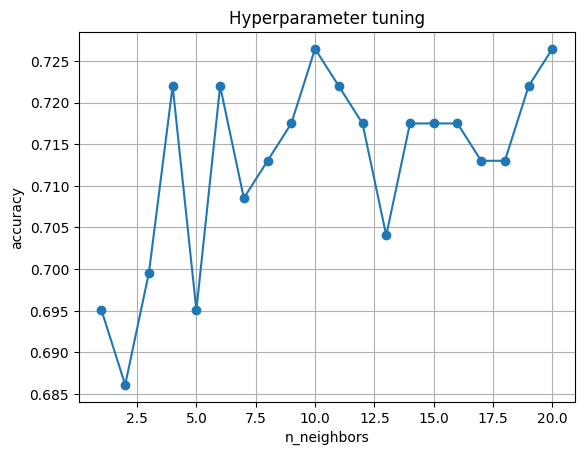

In [ ]:
plt.plot(range(1,21), accuracy_scores, marker = 'o')
plt.title('Hyperparameter tuning')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
best_model = KNeighborsClassifier(n_neighbors=7)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)
print("accuracy:", accuracy_score(y_valid, y_pred))

accuracy: 0.7085201793721974


#Cross-validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

model = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=5)
print("Cross-val-scores", scores)
print('Average score:', np.mean(scores))

Cross-val-scores [0.69662921 0.73033708 0.82022472 0.75280899 0.7740113 ]
Average score: 0.7548022598870057


#Hyperparameter tuning with cross-validation




In [ ]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}
search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [ ]:
search.best_estimator_

KNeighborsClassifier()

In [ ]:
search.best_params_

{'n_neighbors': 5}

In [ ]:
search.best_score_

0.75969027045225

In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010491,0.003732,0.032052,0.016127,1,{'n_neighbors': 1},0.716418,0.744361,0.751880,0.729323,0.789474,0.746291,0.024819,5
1,0.007603,0.003614,0.025846,0.009796,2,{'n_neighbors': 2},0.746269,0.691729,0.721805,0.714286,0.774436,0.729705,0.028346,12
2,0.011020,0.005910,0.047751,0.021619,3,{'n_neighbors': 3},0.753731,0.736842,0.751880,0.744361,0.774436,0.752250,0.012603,2
3,0.011317,0.007427,0.038938,0.015078,4,{'n_neighbors': 4},0.746269,0.706767,0.721805,0.721805,0.744361,0.728201,0.015026,15
4,0.006976,0.003476,0.030732,0.010770,5,{'n_neighbors': 5},0.805970,0.736842,0.766917,0.721805,0.766917,0.759690,0.028995,1
5,0.012081,0.008545,0.063608,0.021018,6,{'n_neighbors': 6},0.798507,0.729323,0.751880,0.729323,0.729323,0.747671,0.026877,4
6,0.006728,0.002233,0.024092,0.004698,7,{'n_neighbors': 7},0.813433,0.691729,0.759398,0.744361,0.736842,0.749153,0.039265,3
7,0.011541,0.003563,0.049867,0.006365,8,{'n_neighbors': 8},0.768657,0.706767,0.706767,0.736842,0.729323,0.729671,0.022894,13
8,0.014969,0.007020,0.049359,0.016695,9,{'n_neighbors': 9},0.813433,0.676692,0.714286,0.736842,0.751880,0.738626,0.045173,8
9,0.012601,0.003206,0.035832,0.010142,10,{'n_neighbors': 10},0.776119,0.721805,0.729323,0.751880,0.751880,0.746201,0.019182,6


In [ ]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.695067264573991
